## Intensity transformations

### Display original image

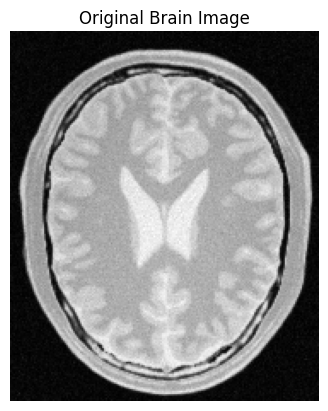

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\brain_proton_density_slice.png'  # Update path to your image file
brain_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert brain_image is not None, "Image not found."

# Original image
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')
plt.show()

### What are `Gray` and `White` matters

<div style="text-align: center;">
    <img src="assignment_1/images/gray-matter-vs-white-matter-322973-1280x720.webp" alt="Gray Matter vs White Matter" style="width: 50%; height: auto;">
</div>

### Get intensity values of `Gray` and `White` matters

In [ ]:
gray_matter_point = 

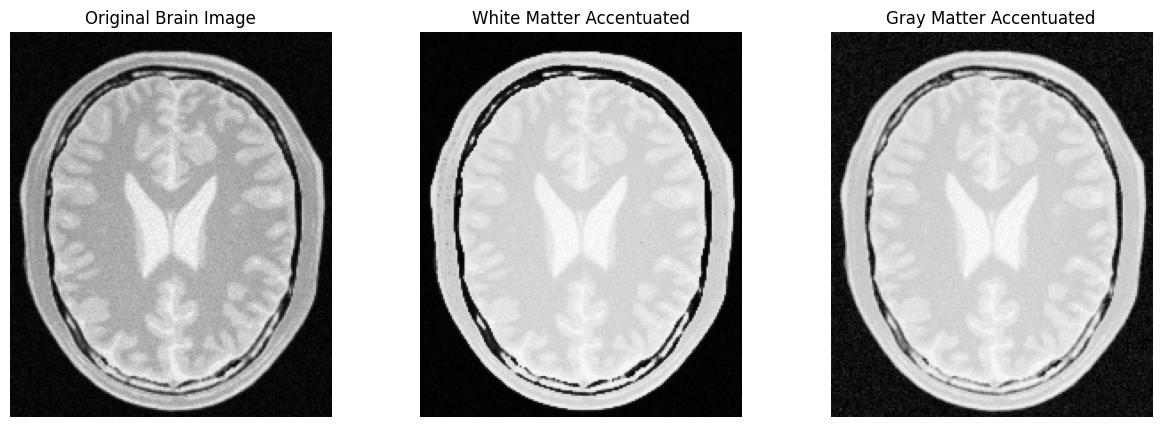

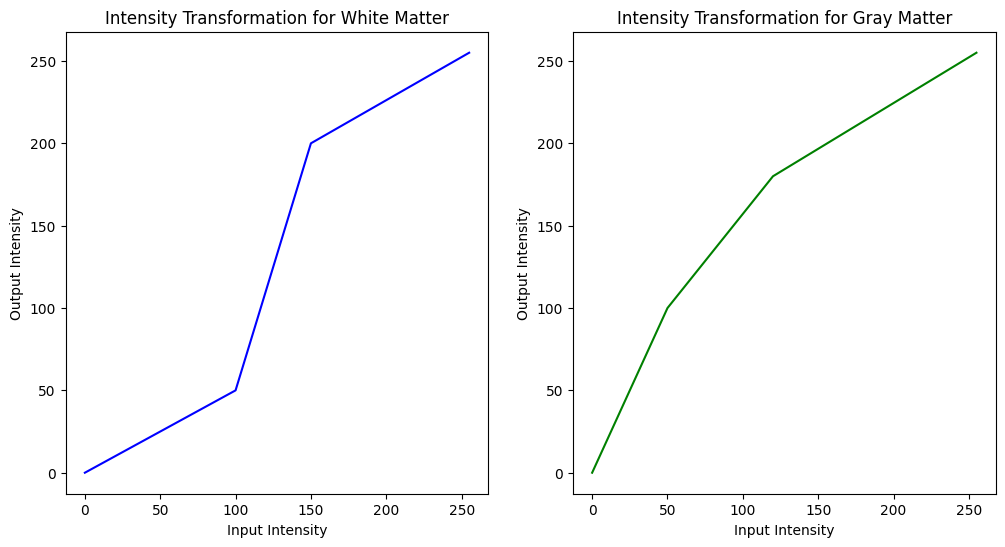

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
image_path = r'C:\Users\Asus\Documents\GitHub\EN3160-Image-Processing-and-Machine-Vision-Lab-Experiments\assignment_1\a1images\brain_proton_density_slice.png'  # Update path to your image file
brain_image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert brain_image is not None, "Image not found."

# Function to apply intensity transformation to accentuate white/gray matter
def accentuate_matter(image, matter='white'):
    if matter == 'white':
        # Apply a transformation to enhance white matter (higher intensity values)
        transformed_image = np.interp(image, [0, 100, 150, 255], [0, 50, 200, 255])
    elif matter == 'gray':
        # Apply a transformation to enhance gray matter (middle intensity values)
        transformed_image = np.interp(image, [0, 50, 120, 255], [0, 100, 180, 255])
    return transformed_image.astype(np.uint8)

# Apply the transformations for both white and gray matter
white_matter_image = accentuate_matter(brain_image, 'white')
gray_matter_image = accentuate_matter(brain_image, 'gray')

# Display original, white matter, and gray matter accentuated images
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(brain_image, cmap='gray')
plt.title('Original Brain Image')
plt.axis('off')

# White matter accentuated image
plt.subplot(1, 3, 2)
plt.imshow(white_matter_image, cmap='gray')
plt.title('White Matter Accentuated')
plt.axis('off')

# Gray matter accentuated image
plt.subplot(1, 3, 3)
plt.imshow(gray_matter_image, cmap='gray')
plt.title('Gray Matter Accentuated')
plt.axis('off')

plt.show()

# Plot the intensity transformations
plt.figure(figsize=(12, 6))

# Transformation for white matter
plt.subplot(1, 2, 1)
input_intensity = np.arange(0, 256)
output_white = np.interp(input_intensity, [0, 100, 150, 255], [0, 50, 200, 255])
plt.plot(input_intensity, output_white, color='blue')
plt.title('Intensity Transformation for White Matter')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

# Transformation for gray matter
plt.subplot(1, 2, 2)
output_gray = np.interp(input_intensity, [0, 50, 120, 255], [0, 100, 180, 255])
plt.plot(input_intensity, output_gray, color='green')
plt.title('Intensity Transformation for Gray Matter')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')

plt.show()